In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc

from getdist import plots, loadMCSamples

rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)

my_colours = ["#4DAF4A", "#377EB8", "#984EA3", "#E41A1C", "#FF7F00"]

## 1. Read all chains

In [4]:
chains_all = loadMCSamples("chains_cobaya_David/chain_cobaya_all",
                           settings={"ignore_rows": 0.2})
chains_0 = loadMCSamples("chains_cobaya_David/chain_cobaya_bin0",
                           settings={"ignore_rows": 0.2})
chains_1 = loadMCSamples("chains_cobaya_David/chain_cobaya_bin1",
                           settings={"ignore_rows": 0.2})
chains_2 = loadMCSamples("chains_cobaya_David/chain_cobaya_bin2",
                           settings={"ignore_rows": 0.2})
chains_3 = loadMCSamples("chains_cobaya_David/chain_cobaya_bin3",
                           settings={"ignore_rows": 0.2})

## 2. Plot constraints

In [5]:
params = ['lMc', 'eta_b', 'gamma']

Triangle plot

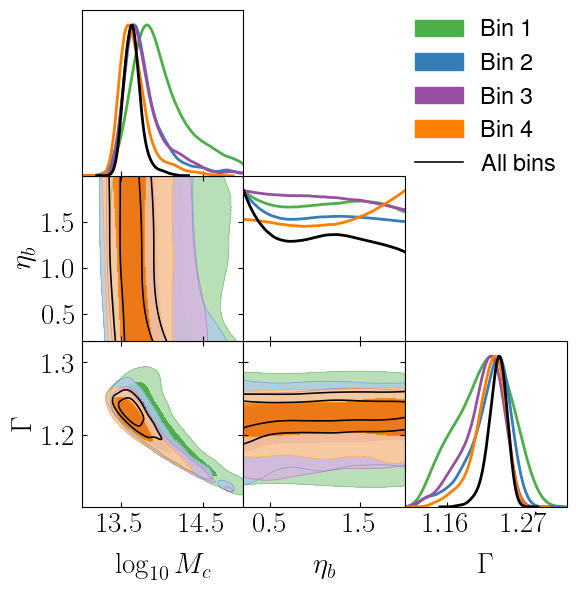

In [6]:
g = plots.get_subplot_plotter()
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 24
g.settings.linewidth = 2
g.settings.figure_legend_frame = False
g.triangle_plot(
    [chains_0, chains_1, chains_2, chains_3, chains_all],
    params,
    filled=[True, True, True, True, False],
    legend_labels=[f"Bin {i+1}" for i in range(4)] + ["All bins"],
    contour_colors=[my_colours[0],
                    my_colours[1],
                    my_colours[2],
                    my_colours[4],
                    "black"],
    line_args=[{"lw": 2, "color": my_colours[0]},
               {"lw": 2, "color": my_colours[1]},
               {"lw": 2, "color": my_colours[2]},
               {"lw": 2, "color": my_colours[4]},
               {"lw": 2, "color": "black"}])

plt.savefig("Plots/triangle_main.pdf")

Rectangle plot

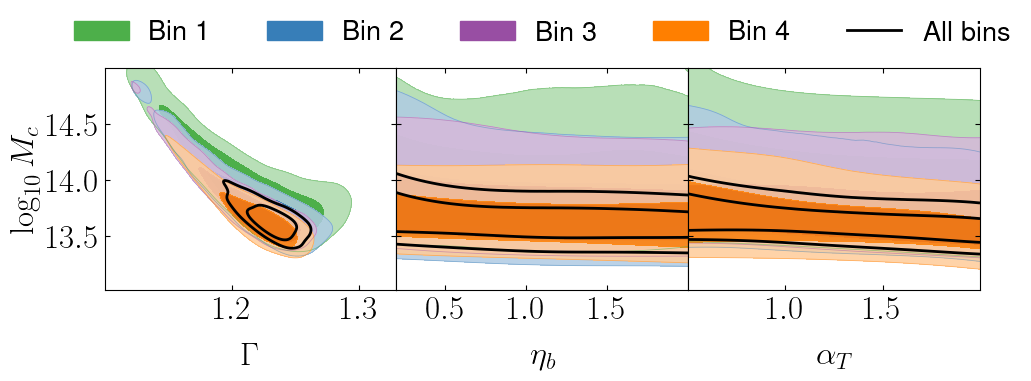

In [7]:
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 24
g.settings.linewidth = 2
g.settings.figure_legend_frame = False
g.rectangle_plot(
    ["gamma", "eta_b", "alpha_T"],
    "lMc",
    roots=[chains_0, chains_1, chains_2, chains_3, chains_all],
    filled=[True, True, True, True, False],
    legend_labels=[f"Bin {i+1}" for i in range(4)] + ["All bins"],
    contour_colors=[my_colours[0],
                    my_colours[1],
                    my_colours[2],
                    my_colours[4],
                    "black"],
    line_args=[{"lw": 2, "color": my_colours[0]},
               {"lw": 2, "color": my_colours[1]},
               {"lw": 2, "color": my_colours[2]},
               {"lw": 2, "color": my_colours[4]},
               {"lw": 2, "color": "black"}])

plt.savefig("Plots/rectangle_main.pdf", bbox_inches="tight")

## 3. $C_\ell$ plot